## **ASTU TRAINING ON AI&ML USING PYTHON (ECKOVATION) Project**
## **Topic: ITC Stock Price Prediction**

### **Submitted By:**
### **Alakesh Bora**
### **Roll No.: 170710007005**
### **CSE 7th Semester**
### **Jorhat Engineering College**

### **Loading required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout

from warnings import filterwarnings

### **Loading ITC dataset**

In [ ]:
filterwarnings("ignore")
data = pd.read_csv("423609_1456925_bundle_archive/ITC.csv")

print("Head values: \n\n")
data.head()

Head values: 




,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ITC,EQ,656.00,694.00,708.50,675.0,708.50,708.50,701.81,562715,3.949174e+13,NaN,NaN,NaN
1,2000-01-04,ITC,EQ,708.50,714.00,729.00,694.3,710.65,712.35,714.16,712637,5.089379e+13,NaN,NaN,NaN
2,2000-01-05,ITC,EQ,712.35,716.25,758.90,660.0,731.00,726.20,732.43,1382149,1.012325e+14,NaN,NaN,NaN
3,2000-01-06,ITC,EQ,726.20,741.00,784.30,741.0,784.30,784.30,776.63,721618,5.604266e+13,NaN,NaN,NaN
4,2000-01-07,ITC,EQ,784.30,832.40,847.05,824.0,847.05,847.05,841.25,231209,1.945046e+13,NaN,NaN,NaN


### **Setting Date as the index**
### **We will predict the VWAP (Volume Weighted Average Price)**

In [ ]:
# Making the Date as the index
data['Date'] = pd.to_datetime(data.Date, format = '%Y-%m-%d')
data.index = data['Date']

print("Columns: \n")
for i in range(len(data.columns)):
  print(f"{i+1}. {data.columns[i]}")

print(f"\n\nShape of Dataset: {data.shape[0]} rows and {data.shape[1]} columns")

print("\n\nTable Description: \n\n")
data.describe()

Columns: 

1. Date
2. Symbol
3. Series
4. Prev Close
5. Open
6. High
7. Low
8. Last
9. Close
10. VWAP
11. Volume
12. Turnover
13. Trades
14. Deliverable Volume
15. %Deliverble


Shape of Dataset: 5141 rows and 15 columns


Table Description: 




,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5141.000000,5141.000000,5141.00000,5141.000000,5141.000000,5141.000000,5141.000000,5.141000e+03,5.141000e+03,2291.000000,4.627000e+03,4627.000000
mean,427.486306,427.750496,433.87410,421.243221,427.367847,427.395876,427.651305,6.339313e+06,1.642367e+14,88775.161502,4.252345e+06,0.598136
std,330.917351,330.997007,336.12186,326.057049,330.862739,330.918415,331.190911,7.751800e+06,1.831116e+14,53138.910137,4.538396e+06,0.124452
min,115.450000,115.000000,116.20000,114.400000,115.500000,115.450000,115.390000,6.797000e+03,5.340132e+11,1425.000000,6.120000e+03,0.098000
25%,202.800000,203.000000,205.40000,199.800000,202.750000,202.750000,202.620000,9.181170e+05,5.223988e+13,55253.000000,1.535765e+06,0.525700
50%,283.800000,284.500000,286.95000,281.000000,283.900000,283.650000,283.710000,4.952996e+06,1.168509e+14,77041.000000,3.419994e+06,0.617000
75%,640.650000,640.000000,647.00000,631.100000,640.000000,640.500000,638.950000,8.373128e+06,2.186632e+14,106694.500000,5.742757e+06,0.688300
max,1940.100000,1946.000000,1964.80000,1916.300000,1940.000000,1940.100000,1933.790000,1.494797e+08,4.254992e+15,667965.000000,8.629348e+07,0.997300


### **Checking for missing values**

In [ ]:
data.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

### **Imputing Missing values with median values**

In [ ]:
# Calculating median
Trades_Median = data['Trades'].median()
Del_Median = data['Deliverable Volume'].median()
Del_Percentage_Median = data['%Deliverble'].median()

# Imputing with respective median values
data.fillna(value = {'Trades': Trades_Median}, inplace = True)
data.fillna(value = {'Deliverable Volume': Del_Median}, inplace = True)
data.fillna(value = {'%Deliverble': Del_Percentage_Median}, inplace = True)

# Checking for missing values again
data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

### **Exploratory Data Analysis**
### **Plotting graphs between interesting features**

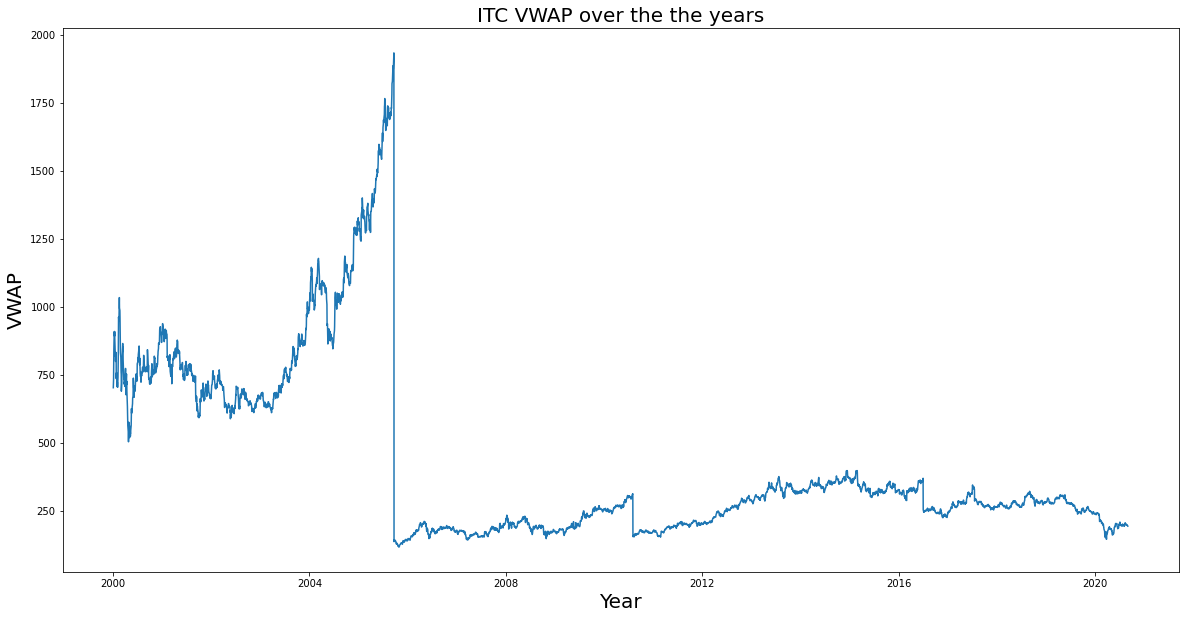

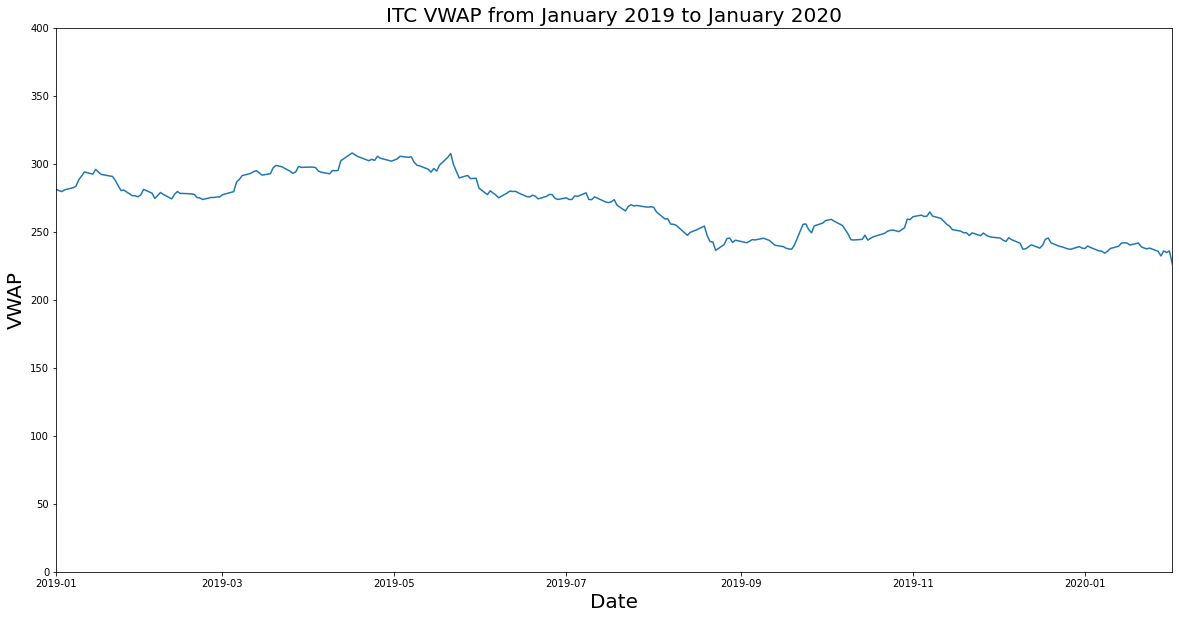

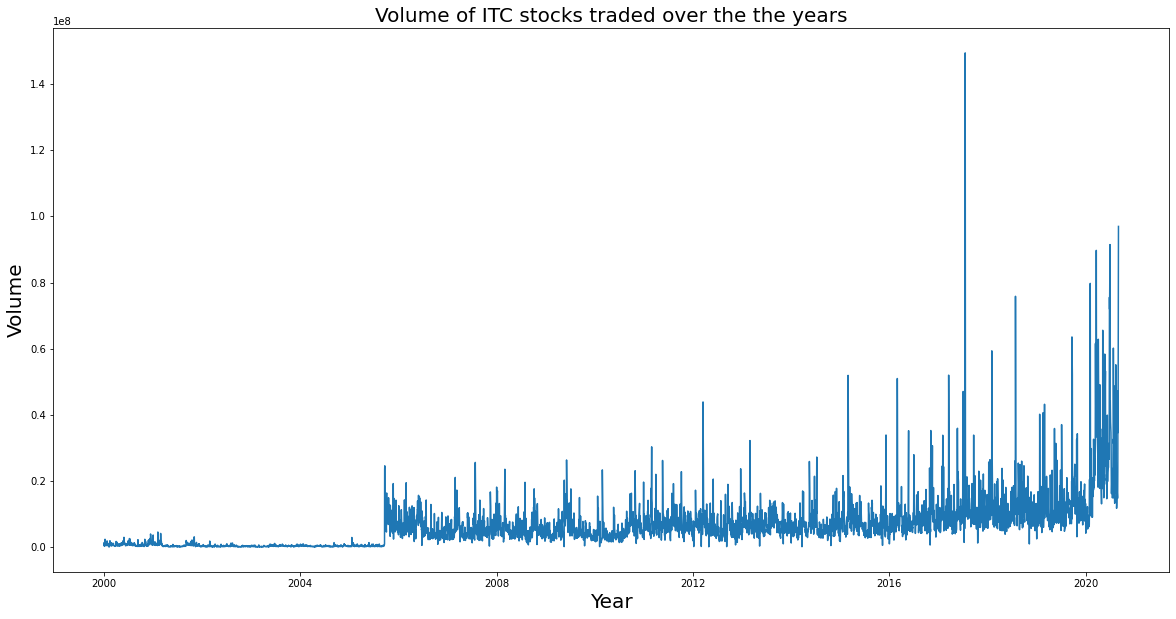

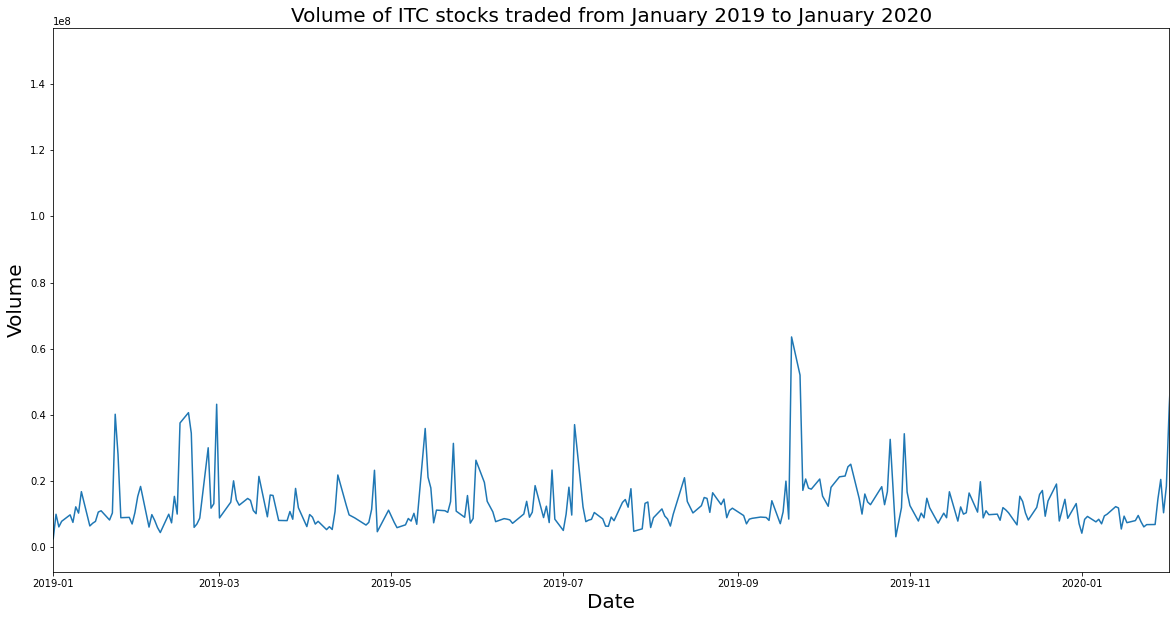

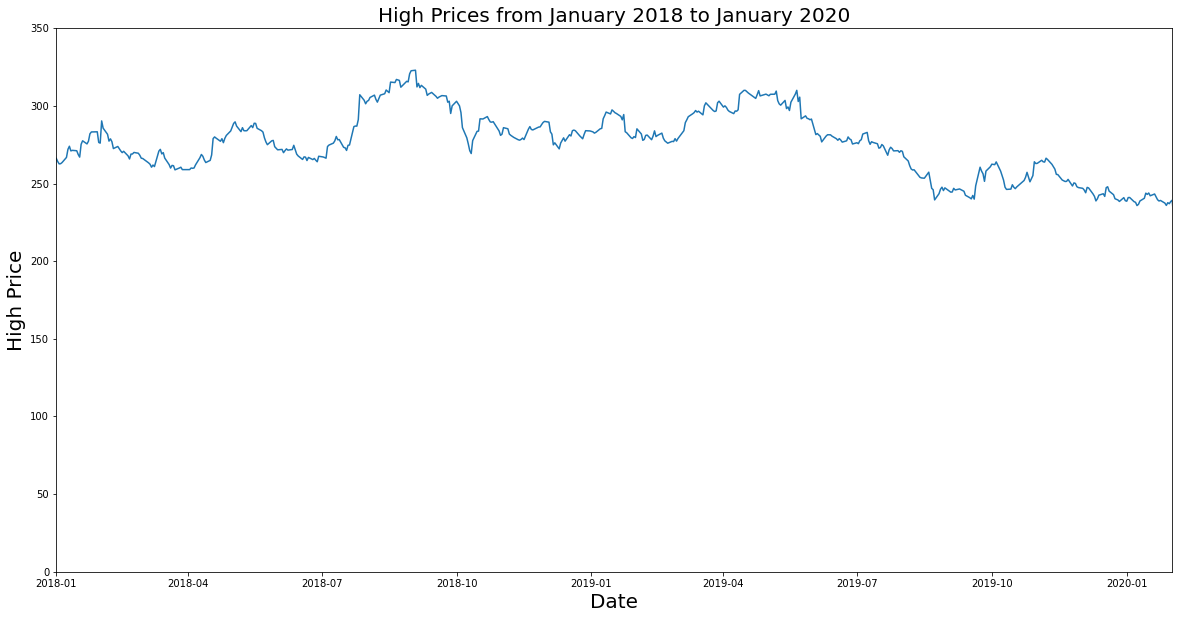

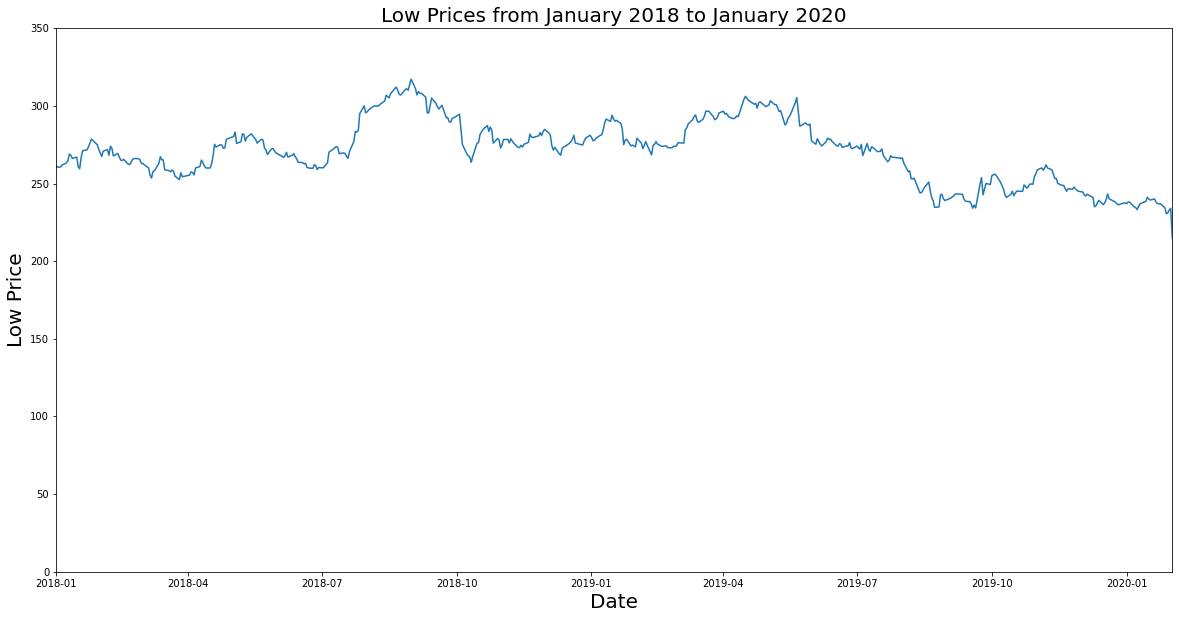

In [ ]:
# Plotting the VWAP over the years
plt.figure(figsize = (20, 10))
plt.xlabel('Year', fontsize = 20)
plt.ylabel('VWAP', fontsize = 20)
plt.title('ITC VWAP over the the years', fontsize = 20)
plt.plot(data['VWAP'], label = 'Historical VWAP over the years')

# VWAP in 2019 - 2020
plt.figure(figsize = (20, 10))
plt.xlabel('Date', fontsize = 20)
plt.ylabel('VWAP', fontsize = 20)
plt.xlim([dt.date(2019, 1, 1), dt.date(2020, 2, 1)])
plt.ylim([0, 400])
plt.title('ITC VWAP from January 2019 to January 2020', fontsize = 20)
plt.plot(data['VWAP'], label = 'ITC VWAP from January 2019 to 20 January 2020')


# Volume Traded over the years
plt.figure(figsize = (20, 10))
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Volume', fontsize = 20)
plt.title('Volume of ITC stocks traded over the the years', fontsize = 20)
plt.plot(data['Volume'], label = 'Volume of ITC stocks traded over the the years')

# Volume Traded in 2019 - 2020
plt.figure(figsize = (20, 10))
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Volume', fontsize = 20)
plt.xlim([dt.date(2019, 1, 1), dt.date(2020, 2, 1)])
plt.title('Volume of ITC stocks traded from January 2019 to January 2020', fontsize = 20)
plt.plot(data['Volume'], label = 'Volume of ITC stocks traded from January 2019 to 20 January 2020')

# High Prices from 2018 - 2020
plt.figure(figsize = (20, 10))
plt.xlabel('Date', fontsize = 20)
plt.ylabel('High Price', fontsize = 20)
plt.xlim([dt.date(2018, 1, 1), dt.date(2020, 2, 1)])
plt.ylim([0, 350])
plt.title('High Prices from January 2018 to January 2020', fontsize = 20)
plt.plot(data['High'], label = 'High Prices from January 2018 to January 2020')

# Low Prices from 2018 - 2020
plt.figure(figsize = (20, 10))
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Low Price', fontsize = 20)
plt.xlim([dt.date(2018, 1, 1), dt.date(2020, 2, 1)])
plt.ylim([0, 350])
plt.title('Low Prices from January 2018 to January 2020', fontsize = 20)
plt.plot(data['Low'], label = 'High Prices from January 2018 to January 2020')

### **Opening, Closing, High and Low prices over the years** 

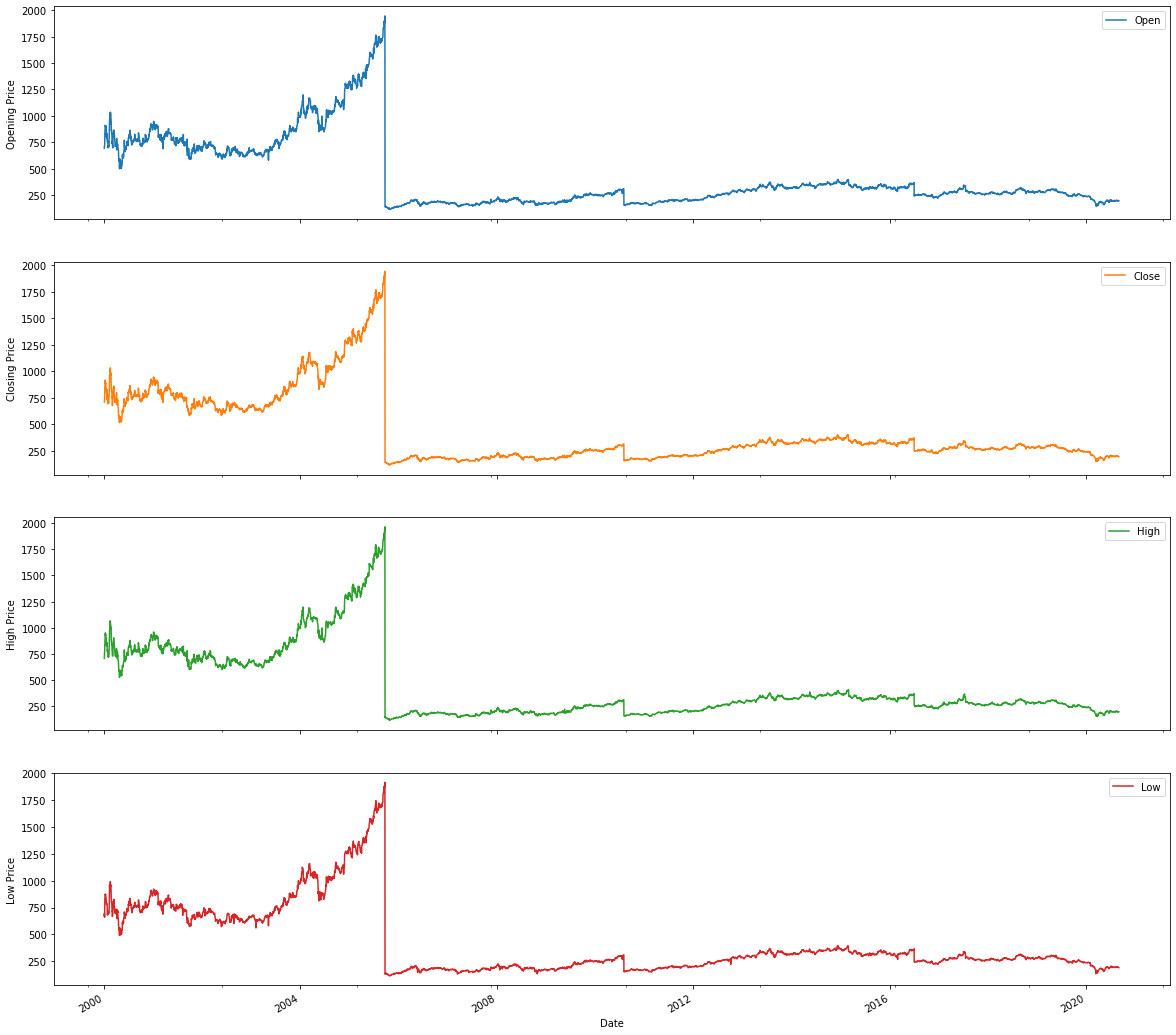

In [ ]:
columns = ['Open', 'Close', 'High', 'Low']
names = ['Opening Price', 'Closing Price', 'High Price', 'Low Price']
counter = 0
axes = data[columns].plot(figsize=(20, 20), subplots=True)
for ax in axes:
    ax.set_ylabel(names[counter])
    counter += 1

### **Conclusions from Exploratory Data Analysis (EDA)**

In [ ]:
print("The prices of ITC stocks have been slowly but consistently dropping since 2019")
print("The volume traded has remained fairly consistent though.")
print("There was a huge drop in ITC share price somewhere around 2005 - 2006")

The prices of ITC stocks have been slowly but consistently dropping since 2019
The volume traded has remained fairly consistent though.
There was a huge drop in ITC share price somewhere around 2005 - 2006


### **Setting VWAP as feature and removing all other features with date as index**

In [ ]:
features = ['Date', 'VWAP']
req_data = data[features]

# Setting date as index
req_data.index = data.Date
req_data.drop('Date', axis = 1, inplace = True)

print(f"Number of columns: {req_data.shape[1]}\nNumber of rows: {req_data.shape[0]}\n\n")

req_data.head()

Number of columns: 1
Number of rows: 5141




,VWAP
Date,
2000-01-03,701.81
2000-01-04,714.16
2000-01-05,732.43
2000-01-06,776.63
2000-01-07,841.25


### **Creating Training and Testing sets**

In [ ]:
dataset = req_data.values

unscaled_train = dataset[2000:4500, :]
unscaled_test = dataset[4500:, :]

print(f"Shape of Unscaled Training data: {unscaled_train.shape}")
print(f"Shape of Unscaled Testing data: {unscaled_test.shape}")

Shape of Unscaled Training data: (2500, 1)
Shape of Unscaled Testing data: (641, 1)


### **Feature Scaling**

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

### **We will cover a window of 90 days, based on which the RNN (LSTM) will predict the 91st day's VWAP**

In [ ]:
# For training set
x_train, y_train = [], []

for i in range(90, len(train)):
  x_train.append(scaled_data[i - 90 : i, 0])
  y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

### **Reshaping the Training data before training the model**

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print(f"Shape of reshaped Training set: {x_train.shape}")

Shape of reshaped Training set: (3910, 90, 1)


### **Creating the Long Short Term Memory (LSTM) model**

In [ ]:
model = Sequential()

# Layer 1 (50 neurons, 20% dropout)
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(rate = 0.2))

# Layer 2
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))

# Layer 3
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))

# Layer 4
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(rate = 0.2))

# Layer 5 (Fully Connected Layer)
model.add(Dense(1))

### **Compiling model using Mean Squared Error (MSE) as Loss Function with Adam Optimizer**

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae'])

### **Fitting the model with our training data with 100 epochs and batch size of 64**

In [ ]:
model.fit(x_train, y_train, epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
62/62 [==============================] - 5s 80ms/step - loss: 0.0109 - mae: 0.0564
Epoch 2/100
62/62 [==============================] - 5s 80ms/step - loss: 0.0035 - mae: 0.0270
Epoch 3/100
62/62 [==============================] - 5s 80ms/step - loss: 0.0033 - mae: 0.0269
Epoch 4/100
62/62 [==============================] - 5s 79ms/step - loss: 0.0029 - mae: 0.0250
Epoch 5/100
62/62 [==============================] - 5s 79ms/step - loss: 0.0031 - mae: 0.0286
Epoch 6/100
62/62 [==============================] - 5s 79ms/step - loss: 0.0025 - mae: 0.0229
Epoch 7/100
62/62 [==============================] - 5s 80ms/step - loss: 0.0024 - mae: 0.0233
Epoch 8/100
62/62 [==============================] - 5s 80ms/step - loss: 0.0022 - mae: 0.0207
Epoch 9/100
62/62 [==============================] - 5s 80ms/step - loss: 0.0020 - mae: 0.0221
Epoch 10/100
62/62 [==============================] - 5s 79ms/step - loss: 0.0021 - mae: 0.0221
Epoch 11/100
62/62 [=============================

### **Saving model and weights**

In [ ]:
# Saving model
model_json = model.to_json()
with open("/content/gdrive/My Drive/Temp/Eckovation Model/model.json", "w") as json_file:
  json_file.write(model_json)

# Saving weights
model.save_weights("/content/gdrive/My Drive/Temp/Eckovation Model/model.h5")
print("Saved model to disk")

Saved model to disk


### **Loading Model and weights**

In [ ]:
from keras.models import model_from_json

model_json = open("/content/gdrive/My Drive/Temp/Eckovation Model/model.json", 'r')
loaded_model = model_json.read()

model = model_from_json(loaded_model)
model_json.close()

model.load_weights("/content/gdrive/My Drive/Temp/Eckovation Model/model.h5")

print("Loaded Model Successfully")

Loaded Model Successfully


### **Preparing Test Data for Prediction**

In [ ]:
test_data = req_data[len(req_data) - len(unscaled_test) - 90:].values
test_data = test_data.reshape(-1, 1)
test_data = scaler.transform(test_data)

print(f"Shape of test data: {test_data.shape}")

x_test = []

for i in range(90, test_data.shape[0]):
  x_test.append(test_data[i - 90: i, 0])  

x_test = np.array(x_test)

print(f"Shape of x_test: {x_test.shape}")

Shape of test data: (731, 1)
Shape of x_test: (641, 90)


### **Reshaping test data before Prediction**

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

(641, 90, 1)

### **Predicting Test Data using our LSTM Model**

In [ ]:
prediction_test = model.predict(x_test)
prediction_test.shape

# Undoing the MinMaxScaler and bringing back to original scale
prediction_test = scaler.inverse_transform(prediction_test)

### **Root Mean Square Error (RMSE) value of Test Set**

In [ ]:
print(f"RMSE score of test set: {np.sqrt(((unscaled_test - prediction_test) ** 2).mean())}")

RMSE score of test set: 6.9152687671410735


### **Plotting Predicted and Actual VWAP of ITC Stocks over the years**

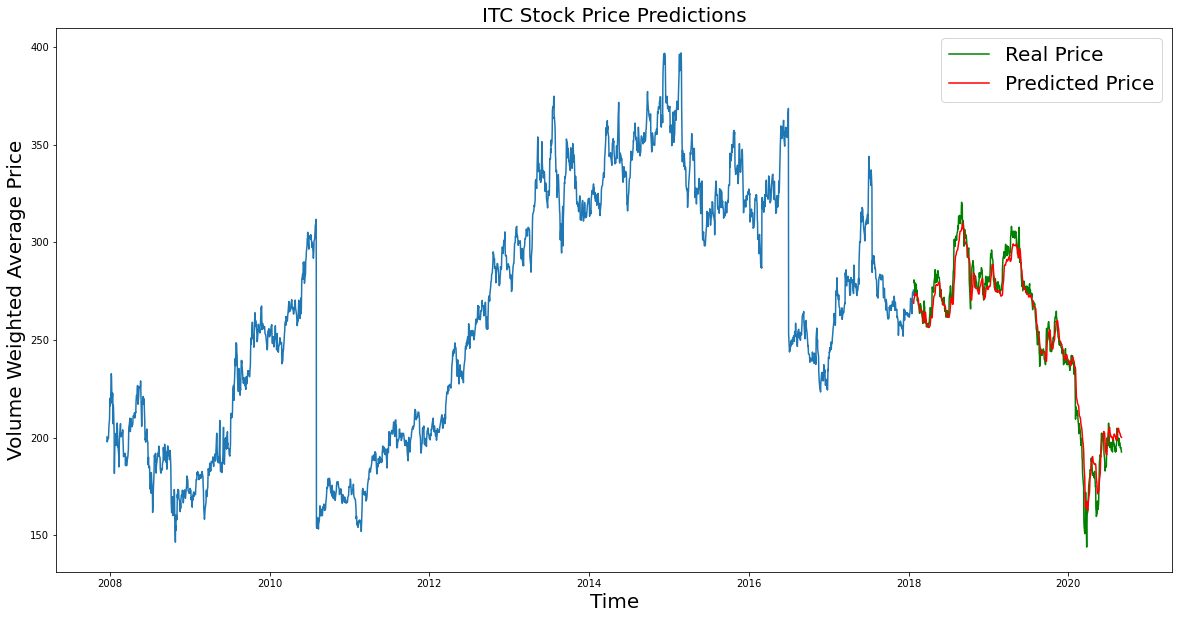

Our predicted prices are very close to the actual prices


In [ ]:
# Bringing back the original data to plot the graph
org_train = data[2000 : 4500]
org_test = data[4500 :]

# Creating a new column with the predictions of out LSTM model
# for easy plotting of the graph
org_test['Predictions'] = prediction_test

plt.figure(figsize = (20,10))
plt.plot(org_train['VWAP'])
plt.plot(org_test['VWAP'], color = 'green', label = 'Real Price')
plt.plot(org_test['Predictions'], color = 'red', label = 'Predicted Price')

plt.title("ITC Stock Price Predictions", fontsize = 20)
plt.xlabel("Time", fontsize = 20)
plt.ylabel("Volume Weighted Average Price", fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

print("Our predicted prices are very close to the actual prices")